<a href="https://colab.research.google.com/github/Ayamokht/DL-NLP-Project/blob/main/NOTEBOOK_V0_Modeles_Aya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installer les bibliothèques manquantes
!pip install -q datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cud

In [24]:
# Google Colab - importer les données depuis Kaggle (plus rapide: 3min environ)

# 🔁 Uploader clé API Kaggle (fichier kaggle.json)
from google.colab import files
files.upload()  # Sélectionne ton fichier kaggle.json téléchargé depuis Kaggle

# 🔐 Configurer l'accès API Kaggle
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# 📦 Télécharger tes datasets Kaggle (remplacé avec les tiens)
!kaggle datasets download -d ayamokhta/product-text
!kaggle datasets download -d ayamokhta/bert-multilingual
!kaggle datasets download -d ayamokhta/nlp-dl-images

# 📂 Dézipper les fichiers téléchargés
import zipfile

with zipfile.ZipFile("product-text.zip", 'r') as zip_ref:
    zip_ref.extractall("rakuten_data/product_text")

with zipfile.ZipFile("bert-multilingual.zip", 'r') as zip_ref:
    zip_ref.extractall("rakuten_data/bert_multilingual")

with zipfile.ZipFile("nlp-dl-images.zip", 'r') as zip_ref:
    zip_ref.extractall("rakuten_data/nlp_dl_images")

# 📚 Vérifier que les fichiers sont bien là
import os
print("📁 Fichiers dans product-text :", os.listdir("rakuten_data/product_text"))
print("📁 Fichiers dans bert-multilingual :", os.listdir("rakuten_data/bert_multilingual"))
print("📁 Dossiers d'images :", os.listdir("rakuten_data/nlp_dl_images"))

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ayamokhta/product-text
License(s): unknown
product-text.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/ayamokhta/bert-multilingual
License(s): unknown
bert-multilingual.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/ayamokhta/nlp-dl-images
License(s): unknown
nlp-dl-images.zip: Skipping, found more recently modified local copy (use --force to force download)
📁 Fichiers dans product-text : ['X_test_update.csv', 'X_train_update.csv', 'Y_train_CVw08PX.csv']
📁 Fichiers dans bert-multilingual : ['bert-multilingual-cased']
📁 Dossiers d'images : ['image_train', 'image_test']


****Le fichier X_test était prévu pour des prédictions finales dans un contexte de compétition, mais comme les vraies cibles ne sont pas fournies, il n’est pas utilisé pour l’évaluation dans ce projet.****

In [28]:
import pandas as pd
import os

from PIL import Image
import matplotlib.pyplot as plt

In [55]:
# === Chargement des CSV ===
x_train = pd.read_csv("rakuten_data/product_text/X_train_update.csv")
y_train = pd.read_csv("rakuten_data/product_text/Y_train_CVw08PX.csv")
# x_test = pd.read_csv("rakuten_data/product_text/X_test_update.csv")

print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
#rint("x_test  :", x_test.shape)

x_train : (84916, 5)
y_train : (84916, 2)


In [56]:
# Supprimer la colonne d’index inutile
y_train = y_train.drop(columns=["Unnamed: 0"], errors='ignore')
x_train = x_train.drop(columns=["Unnamed: 0"], errors='ignore')

# Vérifie qu’il ne reste que la bonne colonne
print(y_train.columns)  # doit afficher ['prdtypecode']

# Fusion propre
df_train = pd.concat([x_train, y_train], axis=1)
print("✅ Fusion réussie :", df_train.shape)
df_train.head()

Index(['prdtypecode'], dtype='object')
✅ Fusion réussie : (84916, 5)


,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


prdtypecode → la variable cible !

In [57]:
# dataframe finale
df_train.head()

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


### Analyse exploratoire des données

In [58]:
df_train["prdtypecode"].nunique() ## on a 27 catégorie de prdts

27

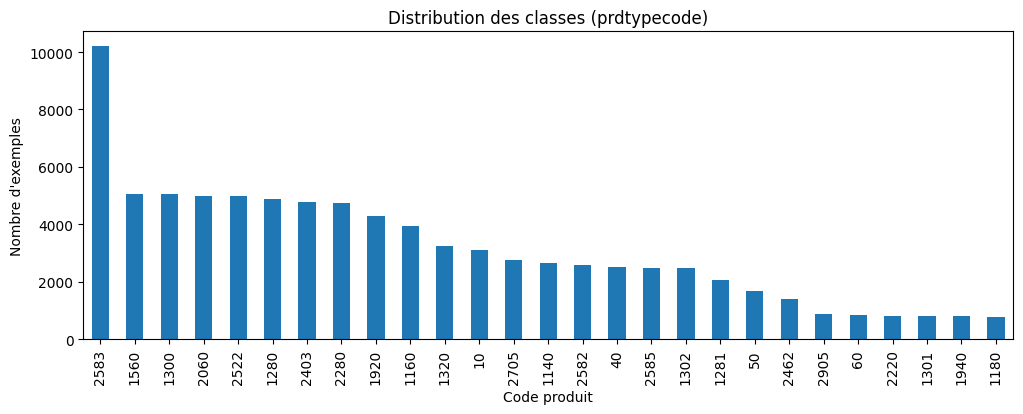

In [59]:
import matplotlib.pyplot as plt

df_train["prdtypecode"].value_counts().plot(kind="bar", figsize=(12,4))
plt.title("Distribution des classes (prdtypecode)")
plt.xlabel("Code produit")
plt.ylabel("Nombre d'exemples")
plt.show()

In [60]:
df_train["description"].isna().mean()

# 35% de valeurs manquantes sur la colonne description..

np.float64(0.3509350416882566)

## Vérification des chemins d'images

In [61]:
image_folder = "rakuten_data/nlp_dl_images/image_train/image_train"

# Générer le nom de fichier image
df_train["image_filename"] = df_train.apply(
    lambda row: f"image_{row['imageid']}_product_{row['productid']}.jpg", axis=1)

# Chemin complet + existence
from pathlib import Path
df_train["image_path"] = df_train["image_filename"].apply(lambda x: os.path.join(image_folder, x))
df_train["image_exists"] = df_train["image_path"].apply(lambda path: Path(path).exists())

print("✅ Images trouvées :", df_train["image_exists"].sum())
print("❌ Images manquantes :", (~df_train["image_exists"]).sum())

✅ Images trouvées : 84916
❌ Images manquantes : 0


🔹 designation: Puzzle Scooby-Doo Avec Poster 2x35 Pieces
🔹 description: nan
🔹 prdtypecode: 1280


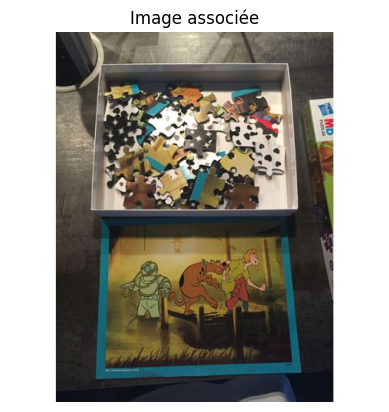

In [62]:
## exemple :

def show_example(row_index):
    row = df_train.iloc[row_index]
    print("🔹 designation:", row["designation"])
    print("🔹 description:", row["description"])
    print("🔹 prdtypecode:", row["prdtypecode"])

    if row["image_exists"]:
        img = Image.open(row["image_path"])
        plt.imshow(img)
        plt.axis("off")
        plt.title("Image associée")
        plt.show()
    else:
        print("❌ Image non trouvée.")

example_index = df_train[df_train["image_exists"]].index[8]
show_example(example_index)

In [63]:
df_train["full_text"] = df_train["designation"].fillna("") + " " + df_train["description"].fillna("")
df_train.head(2)

,designation,description,productid,imageid,prdtypecode,image_filename,image_path,image_exists,full_text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...


## Pre-processing du texte

In [64]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # enlève tout sauf lettres/chiffres/espaces
    text = re.sub(r"\s+", " ", text).strip()  # supprime les espaces multiples
    return text

df_train["clean_text"] = df_train["full_text"].apply(clean_text)

In [65]:
df_train.head()

,designation,description,productid,imageid,prdtypecode,image_filename,image_path,image_exists,full_text,clean_text
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Olivia: Personalisiertes Notizbuch / 150 Seite...,olivia personalisiertes notizbuch 150 seiten p...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,journal des arts le n 133 du 28 09 2001 l art ...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,grand stylet ergonomique bleu gamepad nintendo...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Peluche Donald - Europe - Disneyland 2000 (Mar...,peluche donald europe disneyland 2000 marionne...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,La Guerre Des Tuques Luc a des id&eacute;es de...,la guerre des tuques luc a des id eacute es de...


## MODELISATION

In [66]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df_train,
    test_size=0.2,
    stratify=df_train["prdtypecode"],
    random_state=42
)

In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["prdtypecode"])
val_df["label"] = label_encoder.transform(val_df["prdtypecode"])

print("✅ Nombre de classes :", len(label_encoder.classes_))
train_df.head(2)

✅ Nombre de classes : 27


,designation,description,productid,imageid,prdtypecode,image_filename,image_path,image_exists,full_text,clean_text,label
1887,Porte Bébé Violet Et Rouge Trois-En-Un Mère Mu...,Porte bébé Violet et rouge Trois-en-un mère mu...,3050424970,1187504001,1320,image_1187504001_product_3050424970.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Porte Bébé Violet Et Rouge Trois-En-Un Mère Mu...,porte b b violet et rouge trois en un m re mul...,12
70389,Jesus - Cahiers Du Libre Avenir,Prêtre autrement.,131641431,885888766,10,image_885888766_product_131641431.jpg,rakuten_data/nlp_dl_images/image_train/image_t...,True,Jesus - Cahiers Du Libre Avenir Prêtre autrement.,jesus cahiers du libre avenir pr tre autrement,0


In [68]:
X_train = train_df["clean_text"].astype(str)
y_train = train_df["label"]

X_val = val_df["clean_text"].astype(str)
y_val = val_df["label"]

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisation
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

print("✅ TF-IDF - train :", X_train_tfidf.shape)
print("✅ TF-IDF - val   :", X_val_tfidf.shape)

✅ TF-IDF - train : (67932, 10000)
✅ TF-IDF - val   : (16984, 10000)


### Regression Logistique

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

# 1. Créer le modèle
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    n_jobs=-1
)

# Entraîner le modèle sur les données TF-IDF
model.fit(X_train_tfidf, y_train)

# Prédictions
y_pred = model.predict(X_val_tfidf)

# Évaluation
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"\n🎯 F1-score pondéré sur validation : {round(f1, 4)}")

# Rapport détaillé
print("\n📊 Rapport de classification :")
print(classification_report(y_val, y_pred, digits=3))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



🎯 F1-score pondéré sur validation : 0.7823

📊 Rapport de classification :
              precision    recall  f1-score   support

           0      0.400     0.600     0.480       623
           1      0.716     0.574     0.637       502
           2      0.779     0.756     0.767       336
           3      0.947     0.747     0.835       166
           4      0.739     0.721     0.730       534
           5      0.870     0.886     0.878       791
           6      0.734     0.379     0.500       153
           7      0.662     0.602     0.630       974
           8      0.627     0.454     0.527       414
           9      0.817     0.914     0.863      1009
          10      0.966     0.894     0.929       161
          11      0.827     0.709     0.763       498
          12      0.732     0.699     0.715       648
          13      0.802     0.818     0.810      1015
          14      0.883     0.899     0.891       861
          15      0.881     0.739     0.804       161
      

### Naive Bayes Multinomial

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report

# Créer le modèle Naive Bayes
model_nb = MultinomialNB()

# Entraîner
model_nb.fit(X_train_tfidf, y_train)

# Prédictions
y_pred_nb = model_nb.predict(X_val_tfidf)

# Évaluation
f1_nb = f1_score(y_val, y_pred_nb, average='weighted')
print(f"\n🎯 F1-score pondéré (Naive Bayes) : {round(f1_nb, 4)}")

# Rapport détaillé
print("\n📊 Rapport de classification :")
print(classification_report(y_val, y_pred_nb, digits=3))


🎯 F1-score pondéré (Naive Bayes) : 0.6912

📊 Rapport de classification :
              precision    recall  f1-score   support

           0      0.645     0.157     0.253       623
           1      0.789     0.394     0.526       502
           2      0.728     0.702     0.715       336
           3      0.975     0.717     0.826       166
           4      0.684     0.727     0.705       534
           5      0.822     0.889     0.854       791
           6      0.920     0.150     0.258       153
           7      0.542     0.555     0.549       974
           8      0.668     0.316     0.430       414
           9      0.740     0.877     0.803      1009
          10      0.956     0.671     0.788       161
          11      0.775     0.546     0.641       498
          12      0.778     0.540     0.638       648
          13      0.617     0.729     0.668      1015
          14      0.873     0.791     0.830       861
          15      0.960     0.447     0.610       161
       

### Transformers (BERT Multilingue)

In [72]:
from transformers import BertTokenizer
from datasets import Dataset

# Charger le tokenizer multilingue
model_path = "rakuten_data/bert_multilingual/bert-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_path)

# Créer les datasets HuggingFace à partir des DataFrames
train_dataset = Dataset.from_pandas(train_df[["full_text", "label"]].rename(columns={"full_text": "text"}))
val_dataset = Dataset.from_pandas(val_df[["full_text", "label"]].rename(columns={"full_text": "text"}))

# Fonction de tokenisation
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# Appliquer le tokenizer
train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)

# Spécifier les colonnes à utiliser pour PyTorch
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

print("✅ Tokenisation réussie :", train_dataset[0].keys())

Map:   0%|          | 0/67932 [00:00<?, ? examples/s]

Map:   0%|          | 0/16984 [00:00<?, ? examples/s]

✅ Tokenisation réussie : dict_keys(['label', 'input_ids', 'attention_mask'])


In [73]:
from transformers import BertForSequenceClassification

# Charger BERT multilingue + couche de classification
model = BertForSequenceClassification.from_pretrained(
    model_path,
    num_labels=len(label_encoder.classes_)  # 27 classes chez toi
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at rakuten_data/bert_multilingual/bert-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score
import numpy as np

# Fonction de métrique (F1 pondéré)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {"f1_weighted": f1_score(labels, preds, average="weighted")}

# Paramètres d'entraînement
training_args = TrainingArguments(
    output_dir="./results_bert",
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1_weighted",
    report_to="none"  # pour éviter l’erreur wandb
)

# Créer l’entraîneur
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Lancer l'entraînement
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Weighted
1,0.592800,0.531599,0.841496


TrainOutput(global_step=4246, training_loss=0.8986953505355684, metrics={'train_runtime': 1804.4124, 'train_samples_per_second': 37.648, 'train_steps_per_second': 2.353, 'total_flos': 4469418055572480.0, 'train_loss': 0.8986953505355684, 'epoch': 1.0})

In [76]:
# Prédictions sur la validation
predictions = trainer.predict(val_dataset)
logits = predictions.predictions
y_true = predictions.label_ids
y_pred = np.argmax(logits, axis=1)

# F1-score final
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average="weighted")
print("🎯 F1-score pondéré sur validation :", round(f1, 4))

🎯 F1-score pondéré sur validation : 0.8415


In [ ]:
### FAIRE LE FINE-TUNING des hyperparam !!!

### RESNET (Images)

In [ ]:
# Split images pour modèle ResNet (80/20)
from sklearn.model_selection import train_test_split

# Garder uniquement les lignes avec image existante
df_img = df_train[df_train["image_exists"] == True]

# Split train/val
df_train_img, df_val_img = train_test_split(
    df_img,
    test_size=0.2,
    stratify=df_img["prdtypecode"],
    random_state=42
)

print("📊 Images pour entraînement :", df_train_img.shape[0])
print("📊 Images pour validation :", df_val_img.shape[0])

📊 Images pour entraînement : 67932
📊 Images pour validation : 16984


In [ ]:
# Dataset PyTorch personnalisé pour les images
from torch.utils.data import Dataset
from PIL import Image
import torch
from torchvision import transforms

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.loc[idx, "image_path"]
        label = self.data.loc[idx, "prdtypecode"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# 📐 Transforms pour ResNet50
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 📦 Création des datasets
train_dataset = CustomImageDataset(df_train_img, transform=transform)
val_dataset = CustomImageDataset(df_val_img, transform=transform)

In [ ]:
# Dataloaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("✅ Dataloaders prêts :", len(train_loader), "batches de train |", len(val_loader), "batches de val")

In [ ]:
# Charger et adapter le modèle ResNet50
import torchvision.models as models
import torch.nn as nn

num_classes = df_train["prdtypecode"].nunique()

model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # remplacer la dernière couche FC

In [ ]:
# Entraînement du modèle ResNet50
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 3

for epoch in range(num_epochs):
    print(f"
🔁 Epoch {epoch+1}/{num_epochs}")
    model.train()
    train_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"✅ Loss entraînement : {train_loss/len(train_loader):.4f}")

    # 🔍 Évaluation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"🎯 F1-score pondéré validation : {f1:.4f}")